In [4]:
import sys
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import matplotlib.pyplot as plt
sys.path.insert(-1, '../..')
import _utils

In [6]:
pwd

'/data/extra_files/galen_dropbox_figures/can_reproducibility/lung_models/figure_2'

In [7]:
full_fn = anndata.read('../lung_annotation/annotation/query_and_reference_final.h5ad')

In [9]:
ref = full_fn[full_fn.obs['_dataset']=='ref'].copy()
query = full_fn[full_fn.obs['_dataset']=='query'].copy()
query

AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probabilities'

In [10]:
query.obsm['umap'] = query.obsm['X_scanvi_umap_popv']
ref.obsm['umap'] = ref.obsm['X_scanvi_umap_popv']

In [11]:
full = full_fn

In [12]:
full

AnnData object with n_obs × n_vars = 105322 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probabilities

# UMAPs

In [13]:
# making the palette 

from scanpy.plotting import palettes

# making celltypes to colors
query_ct = np.unique(query.obs['popv_prediction']).tolist()
query_gt_ct = np.unique(query.obs['cell_ontology_class']).tolist()
query_gt_ct = [s.lower() for s in query_gt_ct]

ref_ct = np.unique(ref.obs['cell_ontology_class']).tolist()

all_ct = list(set(ref_ct + query_ct + query_gt_ct))
all_ct.sort()
cmap = palettes.default_102

palette = {}
for i, ct in enumerate(all_ct):
    palette[ct] = cmap[i+1] # added the +1 here because i didnt like how it looked starting with number 1


In [14]:
ref.n_obs

35672

In [15]:
# current point size = 120000/n_cells
print(f'current point size {120000/ref.n_obs}')

current point size 3.3639829558196905


In [16]:
POINT_SIZE = 3

In [17]:
%%capture 
fig = sc.pl.umap(ref,
                 color="cell_ontology_class",
                 frameon=False,
                 title='TS Reference Annotation', 
                 return_fig = True, 
                 size = POINT_SIZE,
                 palette=palette)

In [18]:
#make legend
from matplotlib.lines import Line2D

legend_elements = []
for ct, color in palette.items():
    legend_elements.append(Line2D([], [], color=color, lw =6, label=ct))
    
fig.get_axes()[0].legend(handles=legend_elements,  loc='upper left', bbox_to_anchor=(1, 1), ncol=5)

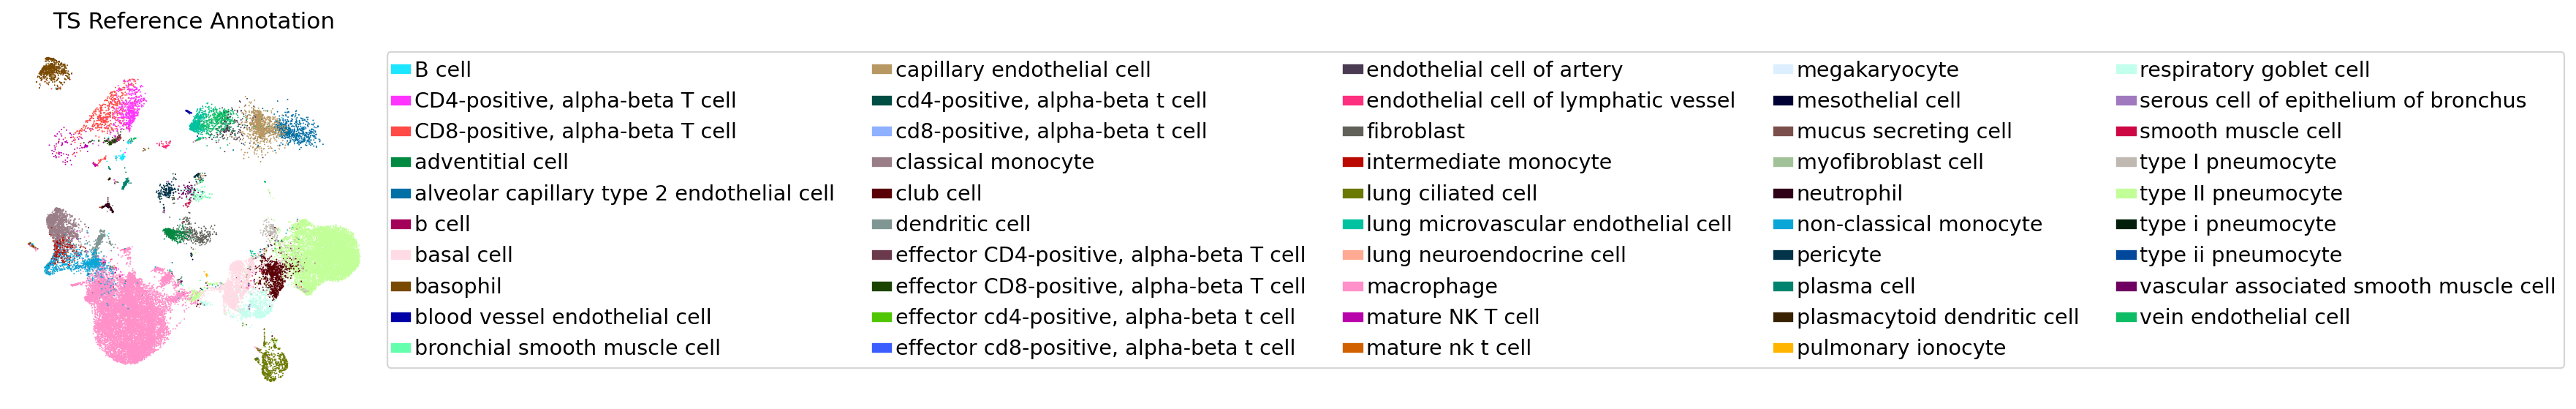

In [19]:
fig

In [20]:
fig.savefig('fig2/fig2_TS_ref_annotation_with_legend.pdf', bbox_inches='tight')

In [21]:
fig.get_axes()[0].get_legend().remove()

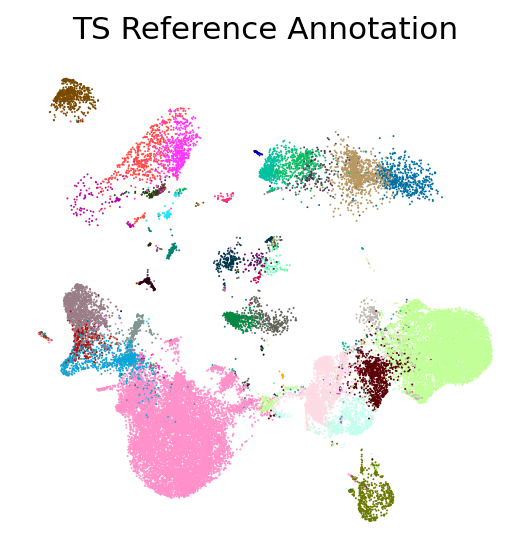

In [22]:
fig

In [23]:
fig.savefig('fig2/fig2_TS_ref_annotation.pdf', bbox_inches='tight')

In [24]:
%%capture
fig = sc.pl.umap(query, 
                 color="popv_prediction", 
                 frameon=False,
                 title='LCA Predicted Annotation',
                 palette=palette,
                 size=POINT_SIZE,
                 return_fig=True)

In [25]:
fig.get_axes()[0].get_legend().remove()

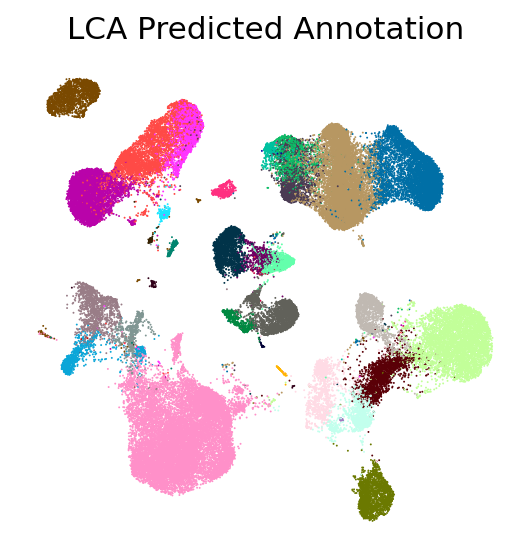

In [26]:
fig

In [27]:
fig.savefig('fig2/fig2_LCA_popv_annotation.pdf', bbox_inches='tight')

In [28]:
# making colors for the lca ground truth annotations
# if it was used for the previous umaps, and the ct exists there, then use that color, 
# else pick from the end of the cmap list to prevent overlaps

query_gt_ct = np.unique(query.obs['cell_ontology_class']).tolist()
query_gt_palette = {}

for i, ct in enumerate(query_gt_ct):
    tmp_ct = ct.lower()
    if tmp_ct in palette:
        query_gt_palette[ct] = palette[tmp_ct]
    else:
        query_gt_palette[ct] = cmap[-i]


In [29]:
%%capture
fig = sc.pl.umap(query, 
                 color="cell_ontology_class", 
                 frameon=False,
                 title='LCA Ground Truth Annotation',
                 palette=palette,
                 size=POINT_SIZE,
                 return_fig=True)

In [30]:
fig.get_axes()[0].get_legend().remove()

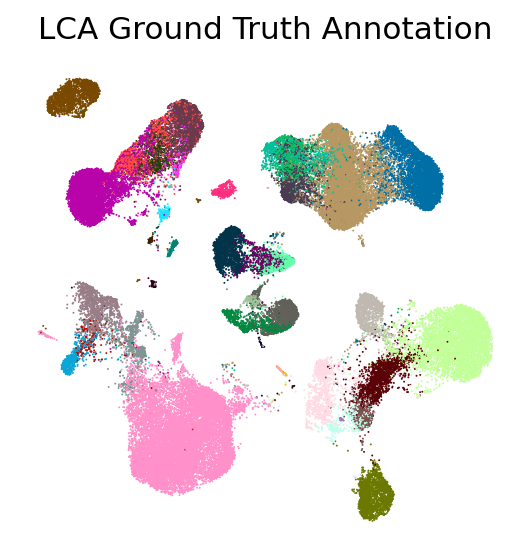

In [31]:
fig

In [32]:
fig.savefig('fig2/fig2_LCA_gt_annotation.pdf', bbox_inches='tight')

In [33]:
# I have to do this or else the plotting takes forever (makes a ton of shit categorical)
tmp_full = anndata.AnnData(scipy.sparse.csr_matrix((full.n_obs, full.n_vars)))

tmp_full.obsm['umap'] = full.obsm['X_scanvi_umap_popv']
tmp_full.obs['_dataset'] = full.obs['_dataset'].values
tmp_full.obs['_dataset'] = tmp_full.obs['_dataset'].replace({'query': 'Query Dataset (LCA)', 'ref': 'Reference Dataset (TS)'})

/tmp/ipykernel_2238161/2316768290.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  tmp_full = anndata.AnnData(scipy.sparse.csr_matrix((full.n_obs, full.n_vars)))


/home/cane/miniconda3/envs/popv_new/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


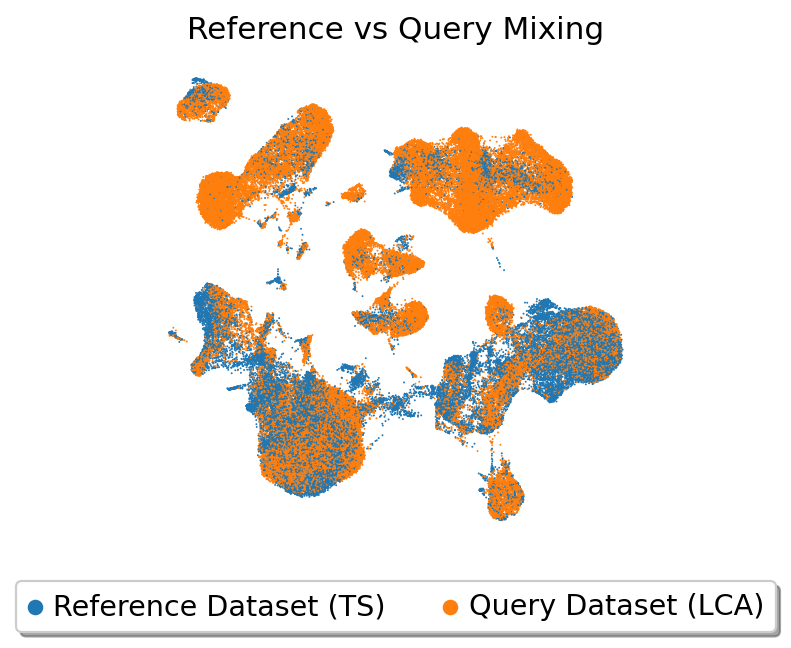

In [34]:
fig = sc.pl.umap(tmp_full[np.random.choice(full.n_obs, full.n_obs, replace=False)], 
                 color= '_dataset',
                 frameon=False,
                 title='Reference vs Query Mixing',
                 size=POINT_SIZE,
                 return_fig=True)

fig.get_axes()[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)



In [35]:
fig.savefig('fig2/fig2_query_ref_mixing.pdf', bbox_inches='tight')

In [59]:
score_palette = {}
cmap = plt.colormaps['tab10']
for score in range(8,0,-1):
    score_palette[score] = cmap(8-score) # added the +1 here because i didnt like how it looked starting with number 1

In [60]:
%%capture
fig = sc.pl.umap(query, color='popv_prediction_score', 
                 title='PopV Agreement Score', 
                 frameon=False,
                 size=POINT_SIZE,
                 return_fig=True,
                 palette=score_palette)

In [61]:
# making legend horizontal
scores = query.obs['popv_prediction_score'].cat.categories.tolist()
colors =  query.uns['popv_prediction_score_colors']

legend_elements = []
for score, color in zip(scores, colors):
    legend_elements.append(Line2D([], [], color=color, lw=4, label=score))
    
fig.get_axes()[0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=8)


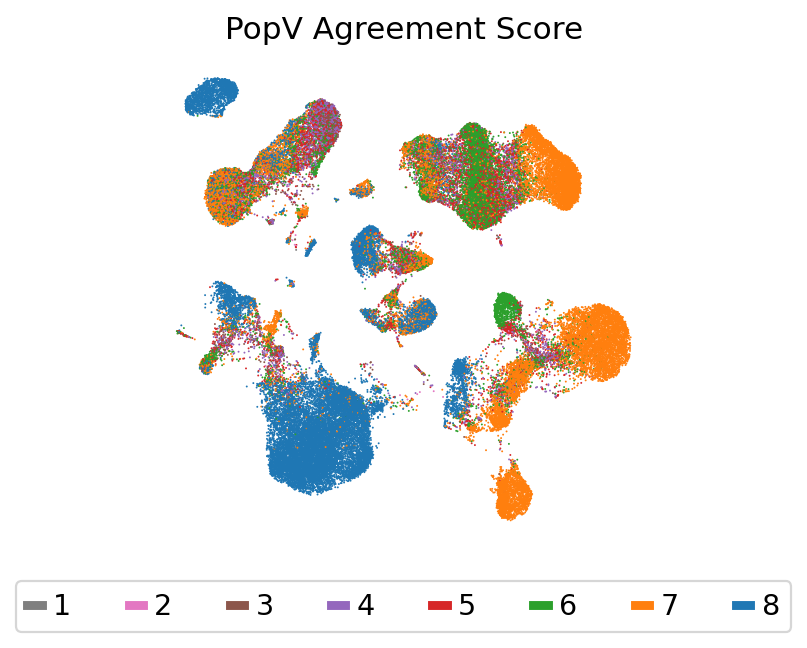

In [62]:
fig

In [63]:
fig.savefig('fig2/fig2_popv_method_agreement.pdf', bbox_inches='tight')

# Accuracy and Seurat majority score

In [182]:
adata = sc.read('../lung_annotation/annotation/query_and_reference_final.h5ad')

In [183]:
query = adata[adata.obs['_dataset']=='query']

In [184]:
query

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [187]:
df = query.obs[["popv_majority_vote_score", 'consensus_ontology_accuracy']]

In [189]:
scores = np.unique(df['popv_majority_vote_score'])

In [190]:
acc_labels = np.unique(df['consensus_ontology_accuracy'])

In [191]:
acc_labels

array(['child', 'exact', 'no match', 'parent', 'sibling'], dtype=object)

In [192]:
parent = 'parent'
child = 'child'
exact = 'exact'
sibling = 'sibling'

In [194]:
exact_acc = []
parent_acc = []
child_acc = []
sibling_acc = []
neighborhood_acc = []
ns = []
for score in scores:
    tmp = df[df['popv_majority_vote_score']==score]
    n = tmp.shape[0]
    
    ns.append(n)
    
    correct1 = tmp[tmp['consensus_ontology_accuracy'] == exact].shape[0]
    exact_acc.append(correct1/n)
    
    correct2 = tmp[tmp['consensus_ontology_accuracy'] == parent].shape[0]
    parent_acc.append(correct2/n)
    
    correct3 = tmp[tmp['consensus_ontology_accuracy'] == child].shape[0]
    child_acc.append(correct3/n)
    
    correct4 = tmp[tmp['consensus_ontology_accuracy'] == sibling].shape[0]
    sibling_acc.append(correct4/n)
    
    neighborhood_score = (correct1+correct2+correct3+correct4)/n
    neighborhood_acc.append(neighborhood_score)
    print(score, neighborhood_score, n)

2 0.4594594594594595 37
3 0.615819209039548 531
4 0.7283570604078492 2599
5 0.7730426164519326 4036
6 0.8957047156180218 7613
7 0.9490686356771271 11918
8 0.9737160965607232 42916


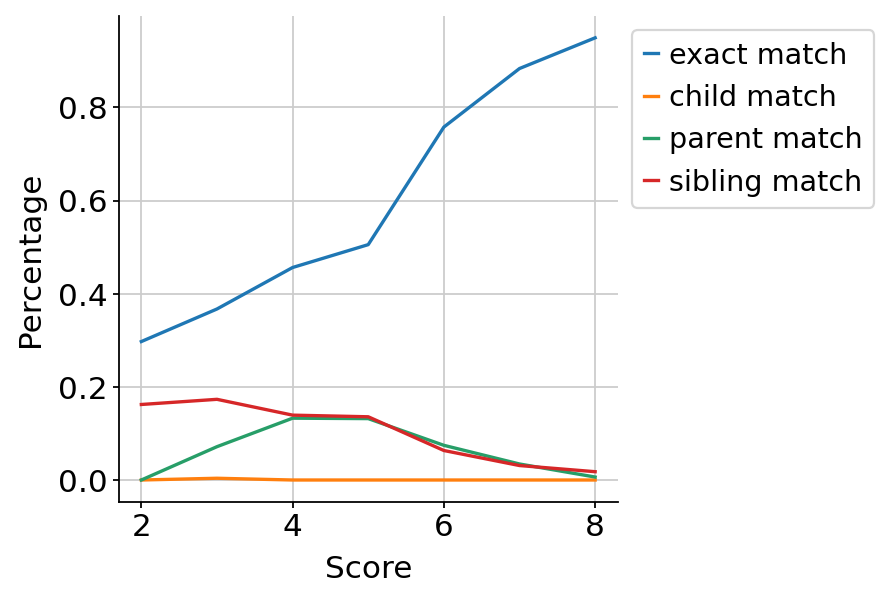

In [195]:
plt.plot(scores, exact_acc, label= 'exact match')
plt.plot(scores, child_acc, label = 'child match')
plt.plot(scores, parent_acc, label = 'parent match')
plt.plot(scores, sibling_acc, label = 'sibling match')
# plt.plot(scores, neighborhood_acc, label = 'neighbor match')

plt.ylabel('Percentage')
plt.xlabel('Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.savefig('fig2/fig2_score_percentage.pdf', bbox_inches='tight')
plt.show()


In [196]:
ns

[37, 531, 2599, 4036, 7613, 11918, 42916]

In [197]:
labels = [f'{s} (n={n})' for s,n in zip(scores, ns)]

In [198]:
df = pd.DataFrame(index = labels)

In [199]:
df['Exact Match'] = exact_acc
df['Child Match'] = child_acc
df['Parent Match'] = parent_acc
df['Sibling Match'] = sibling_acc

In [200]:
df['No Match'] = 1 - df.sum(axis=1)

In [201]:
df

,Exact Match,Child Match,Parent Match,Sibling Match,No Match
2 (n=37),0.297297,0.000000,0.000000,0.162162,0.540541
3 (n=531),0.367232,0.003766,0.071563,0.173258,0.384181
4 (n=2599),0.456329,0.000000,0.132743,0.139284,0.271643
5 (n=4036),0.505451,0.000000,0.131814,0.135778,0.226957
6 (n=7613),0.757914,0.000000,0.074478,0.063313,0.104295
7 (n=11918),0.883621,0.000000,0.034402,0.031045,0.050931
8 (n=42916),0.949553,0.000000,0.006338,0.017826,0.026284


In [202]:
df

,Exact Match,Child Match,Parent Match,Sibling Match,No Match
2 (n=37),0.297297,0.000000,0.000000,0.162162,0.540541
3 (n=531),0.367232,0.003766,0.071563,0.173258,0.384181
4 (n=2599),0.456329,0.000000,0.132743,0.139284,0.271643
5 (n=4036),0.505451,0.000000,0.131814,0.135778,0.226957
6 (n=7613),0.757914,0.000000,0.074478,0.063313,0.104295
7 (n=11918),0.883621,0.000000,0.034402,0.031045,0.050931
8 (n=42916),0.949553,0.000000,0.006338,0.017826,0.026284


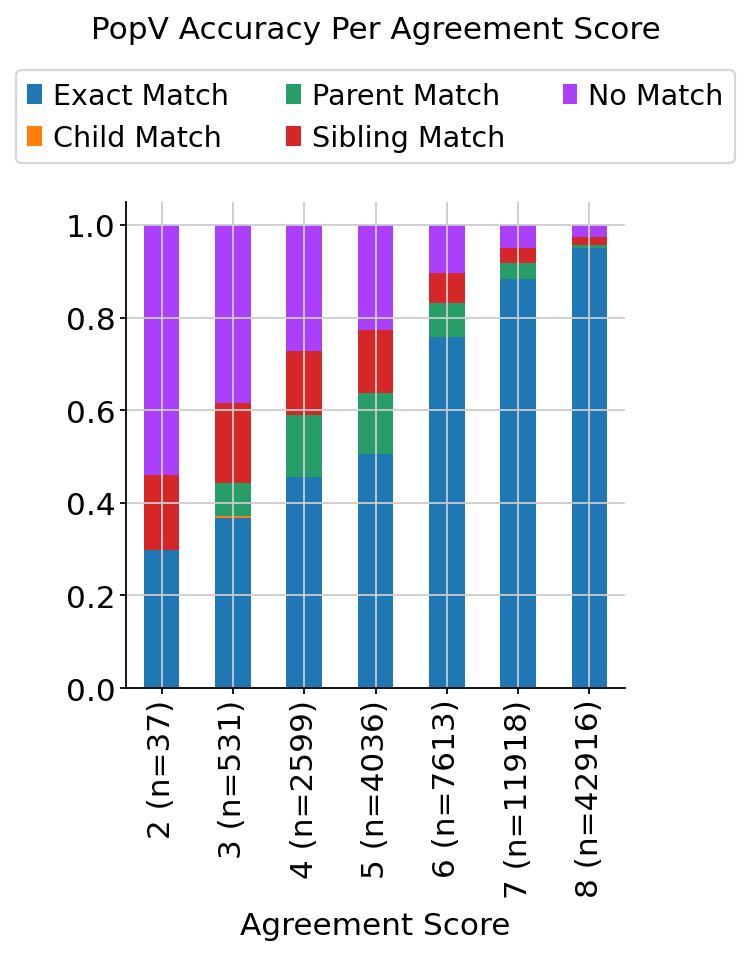

In [203]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('PopV Accuracy Per Agreement Score', y=1.3)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
plt.savefig('fig2/fig2_lca_prediction_accuracy_new.pdf', bbox_inches='tight')

# Accuracy and Seurat

In [211]:
adata = sc.read('../lung_annotation/annotation/query_and_reference_final.h5ad')

In [212]:
query = adata[adata.obs['_dataset']=='query']

In [213]:
query

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [214]:
df = query.obs[["popv_prediction_score", 'consensus_ontology_accuracy']]

In [215]:
scores = np.unique(df['popv_prediction_score'])

In [216]:
acc_labels = np.unique(df['consensus_ontology_accuracy'])

In [217]:
acc_labels

array(['child', 'exact', 'no match', 'parent', 'sibling'], dtype=object)

In [218]:
parent = 'parent'
child = 'child'
exact = 'exact'
sibling = 'sibling'

In [219]:
exact_acc = []
parent_acc = []
child_acc = []
sibling_acc = []
neighborhood_acc = []
ns = []
for score in scores:
    tmp = df[df['popv_prediction_score']==score]
    n = tmp.shape[0]
    
    ns.append(n)
    
    correct1 = tmp[tmp['consensus_ontology_accuracy'] == exact].shape[0]
    exact_acc.append(correct1/n)
    
    correct2 = tmp[tmp['consensus_ontology_accuracy'] == parent].shape[0]
    parent_acc.append(correct2/n)
    
    correct3 = tmp[tmp['consensus_ontology_accuracy'] == child].shape[0]
    child_acc.append(correct3/n)
    
    correct4 = tmp[tmp['consensus_ontology_accuracy'] == sibling].shape[0]
    sibling_acc.append(correct4/n)
    
    neighborhood_score = (correct1+correct2+correct3+correct4)/n
    neighborhood_acc.append(neighborhood_score)
    print(score, neighborhood_score, n)

1 0.3333333333333333 3
2 0.6296296296296297 81
3 0.6374501992031872 1255
4 0.766506922257721 3756
5 0.8602809324566647 6692
6 0.9410888631474433 12086
7 0.9461131939111974 22139
8 0.9927658854387004 23638


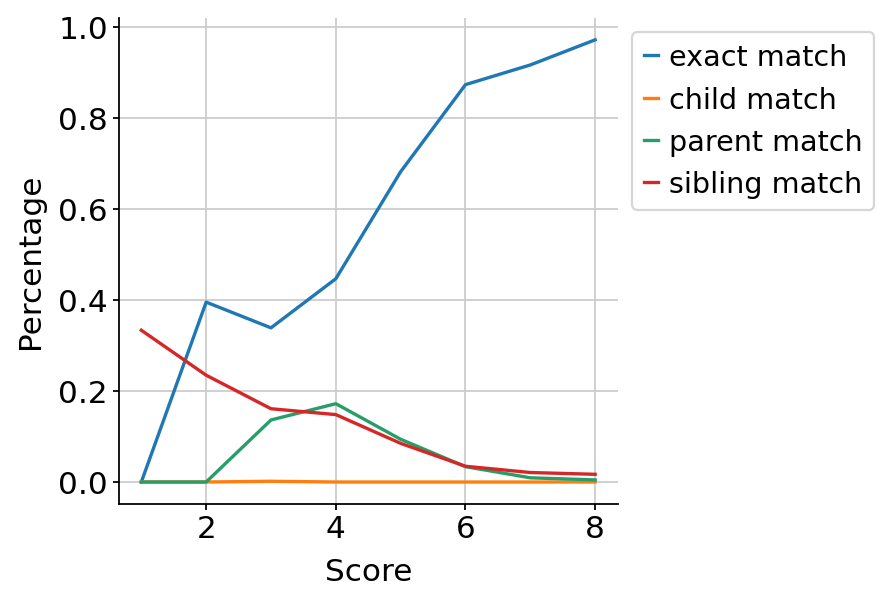

In [220]:
plt.plot(scores, exact_acc, label= 'exact match')
plt.plot(scores, child_acc, label = 'child match')
plt.plot(scores, parent_acc, label = 'parent match')
plt.plot(scores, sibling_acc, label = 'sibling match')
# plt.plot(scores, neighborhood_acc, label = 'neighbor match')

plt.ylabel('Percentage')
plt.xlabel('Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.savefig('fig2/fig2_score_percentage.pdf', bbox_inches='tight')
plt.show()


In [221]:
ns

[3, 81, 1255, 3756, 6692, 12086, 22139, 23638]

In [222]:
labels = [f'{s} (n={n})' for s,n in zip(scores, ns)]

In [223]:
df = pd.DataFrame(index = labels)

In [224]:
df['Exact Match'] = exact_acc
df['Child Match'] = child_acc
df['Parent Match'] = parent_acc
df['Sibling Match'] = sibling_acc

In [225]:
df['No Match'] = 1 - df.sum(axis=1)

In [226]:
df

,Exact Match,Child Match,Parent Match,Sibling Match,No Match
1 (n=3),0.000000,0.000000,0.000000,0.333333,0.666667
2 (n=81),0.395062,0.000000,0.000000,0.234568,0.370370
3 (n=1255),0.338645,0.001594,0.136255,0.160956,0.362550
4 (n=3756),0.446486,0.000000,0.171991,0.148030,0.233493
5 (n=6692),0.681560,0.000000,0.093843,0.084877,0.139719
6 (n=12086),0.872828,0.000000,0.033675,0.034585,0.058911
7 (n=22139),0.916076,0.000000,0.009215,0.020823,0.053887
8 (n=23638),0.971275,0.000000,0.004569,0.016922,0.007234


In [227]:
df

,Exact Match,Child Match,Parent Match,Sibling Match,No Match
1 (n=3),0.000000,0.000000,0.000000,0.333333,0.666667
2 (n=81),0.395062,0.000000,0.000000,0.234568,0.370370
3 (n=1255),0.338645,0.001594,0.136255,0.160956,0.362550
4 (n=3756),0.446486,0.000000,0.171991,0.148030,0.233493
5 (n=6692),0.681560,0.000000,0.093843,0.084877,0.139719
6 (n=12086),0.872828,0.000000,0.033675,0.034585,0.058911
7 (n=22139),0.916076,0.000000,0.009215,0.020823,0.053887
8 (n=23638),0.971275,0.000000,0.004569,0.016922,0.007234


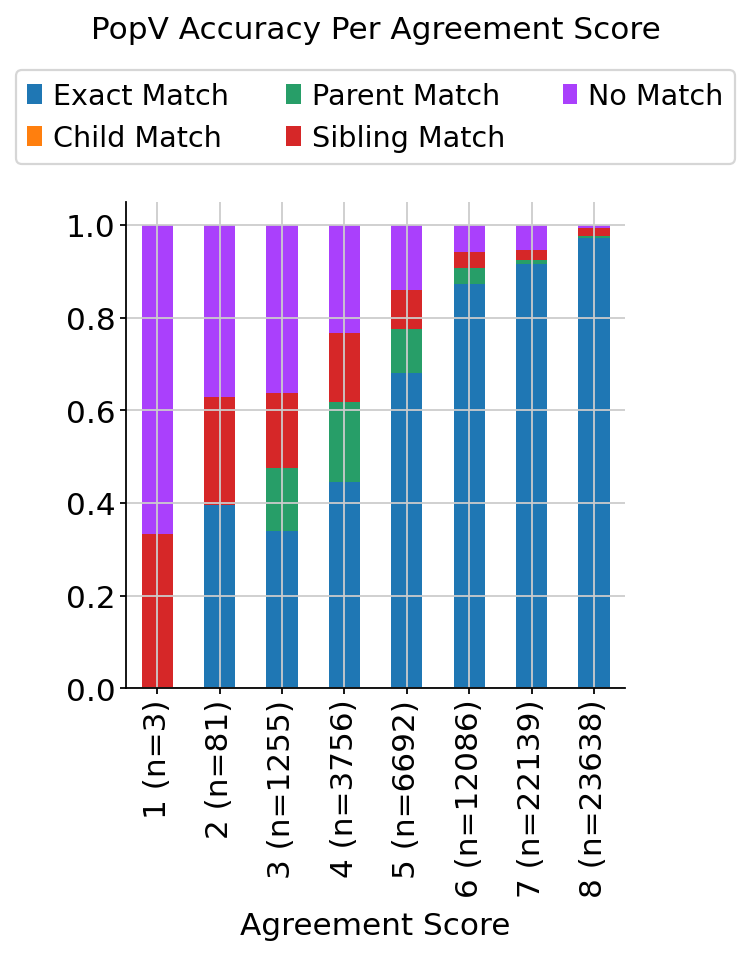

In [228]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('PopV Accuracy Per Agreement Score', y=1.3)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
plt.savefig('fig2/fig2_lca_prediction_accuracy_new.pdf', bbox_inches='tight')

In [229]:
accuracy_replace_dict = {'exact': 'Exact Match', 
                         'parent': 'Parent Match',
                         'child': "Child Match",
                         'sibling': 'Sibling Match',
                         'no match': 'No Match'
                        }

In [230]:
import itertools

ontology_vote_cols = [s for s in query.obs.keys() if s.endswith('ontology_accuracy')]
print(ontology_vote_cols)

all_accs = [list(query.obs[s].value_counts().index) for s in ontology_vote_cols]
all_accs = list(itertools.chain.from_iterable(all_accs))
all_accs = list(set(all_accs))


['consensus_ontology_accuracy', 'popv_celltypist_prediction_ontology_accuracy', 'popv_onclass_prediction_ontology_accuracy', 'popv_scanvi_prediction_ontology_accuracy', 'popv_rf_prediction_ontology_accuracy', 'popv_knn_on_scanorama_prediction_ontology_accuracy', 'popv_svm_prediction_ontology_accuracy', 'popv_onclass_seen_ontology_accuracy', 'popv_knn_on_scvi_prediction_ontology_accuracy', 'popv_knn_on_bbknn_prediction_ontology_accuracy', 'seurat_prediction_ontology_accuracy']


In [231]:
all_accs

['exact', 'no match', 'parent', 'sibling', 'child']

In [232]:
accuracy_replace_dict

{'exact': 'Exact Match',
 'parent': 'Parent Match',
 'child': 'Child Match',
 'sibling': 'Sibling Match',
 'no match': 'No Match'}

In [233]:
query

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [234]:
cat_order = [
    "Exact Match",
    "Parent Match",
    "Child Match",
    "Sibling Match",
    "No Match",
]

for s in ontology_vote_cols:
    print(s)
    query.obs[f'{s}_annotated'] = query.obs[s].replace(accuracy_replace_dict)
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].astype('category')
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].cat.add_categories(set(cat_order)-set(query.obs[f'{s}_annotated'].cat.categories))
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].values.reorder_categories(cat_order)

consensus_ontology_accuracy


/tmp/ipykernel_2238161/3730816500.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query.obs[f'{s}_annotated'] = query.obs[s].replace(accuracy_replace_dict)


popv_celltypist_prediction_ontology_accuracy
popv_onclass_prediction_ontology_accuracy
popv_scanvi_prediction_ontology_accuracy
popv_rf_prediction_ontology_accuracy
popv_knn_on_scanorama_prediction_ontology_accuracy
popv_svm_prediction_ontology_accuracy
popv_onclass_seen_ontology_accuracy
popv_knn_on_scvi_prediction_ontology_accuracy
popv_knn_on_bbknn_prediction_ontology_accuracy
seurat_prediction_ontology_accuracy


In [235]:
from matplotlib import cm, colors

# Colorblindness adjusted vega_10
# See https://github.com/scverse/scanpy/issues/387
vega_10 = list(map(colors.to_hex, cm.tab10.colors))


In [236]:
vega_10

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [237]:
color_map = ['#1f77b4',
             '#2ca02c',
             '#9467bd',
             '#ff7f0e',
             '#d62728',
             '#8c564b',
             '#e377c2',
             '#7f7f7f',
             '#bcbd22',
             '#17becf']

In [238]:
query.obsm['X_umap'] = query.obsm['X_scanvi_umap_popv']

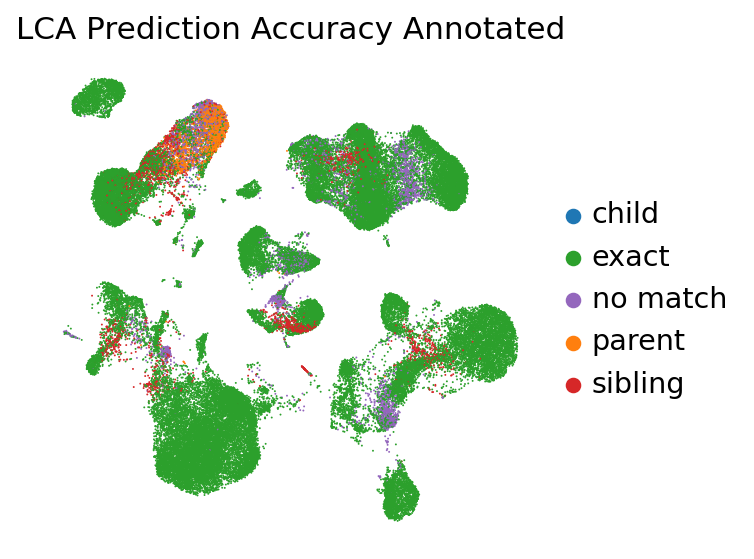

In [239]:
# TODO add an N here

fig = sc.pl.umap(query,
                 color= 'consensus_ontology_accuracy',
                 title='LCA Prediction Accuracy Annotated',
                 frameon=False,
                 size=3,
                palette=color_map,
                 return_fig=True)


In [240]:

fig.savefig('fig2/fig2_lca_prediction_accuracy_annotated.pdf', bbox_inches='tight')


In [105]:
query.obs

,tissue_in_publication,donor_id,free_annotation,compartment,cell_type_ontology_term_id,cell_type,assay,sex,tissue,cell_ontology_class,...,popv_celltypist_prediction_ontology_accuracy_annotated,popv_onclass_prediction_ontology_accuracy_annotated,popv_scanvi_prediction_ontology_accuracy_annotated,popv_rf_prediction_ontology_accuracy_annotated,popv_knn_on_scanorama_prediction_ontology_accuracy_annotated,popv_svm_prediction_ontology_accuracy_annotated,popv_onclass_seen_ontology_accuracy_annotated,popv_knn_on_scvi_prediction_ontology_accuracy_annotated,popv_knn_on_bbknn_prediction_ontology_accuracy_annotated,seurat_prediction_ontology_accuracy_annotated
P1_4_TTGGAACTCCGTAGTA,NaN,1,NaN,immune,NaN,NaN,10x 3' v2,NaN,lung,macrophage,...,Exact Match,Child Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
P1_4_TTGGCAAAGAGGACGG,NaN,1,NaN,immune,NaN,NaN,10x 3' v2,NaN,lung,macrophage,...,Exact Match,Child Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
P1_4_TTCTTAGAGGATGGTC,NaN,1,NaN,immune,NaN,NaN,10x 3' v2,NaN,lung,macrophage,...,Exact Match,Child Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
P1_4_TTGGAACAGGGATCTG,NaN,1,NaN,immune,NaN,NaN,10x 3' v2,NaN,lung,macrophage,...,Exact Match,Child Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
P1_4_TTGCGTCTCAGATAAG,NaN,1,NaN,immune,NaN,NaN,10x 3' v2,NaN,lung,macrophage,...,Exact Match,Child Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K23_B003269.gencode.vH29,NaN,3,NaN,immune,NaN,NaN,Smart-seq2,NaN,lung,mature NK T cell,...,Exact Match,Parent Match,Exact Match,Exact Match,Exact Match,Sibling Match,Exact Match,Exact Match,Sibling Match,Exact Match
K21_B003269.gencode.vH29,NaN,3,NaN,immune,NaN,NaN,Smart-seq2,NaN,lung,mature NK T cell,...,Sibling Match,Parent Match,Sibling Match,Sibling Match,Sibling Match,Sibling Match,Sibling Match,Sibling Match,Sibling Match,Exact Match
B4_B002460.gencode.vH29,NaN,3,NaN,epithelial,NaN,NaN,Smart-seq2,NaN,lung,type II pneumocyte,...,Exact Match,Parent Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match
K19_B003269.gencode.vH29,NaN,3,NaN,immune,NaN,NaN,Smart-seq2,NaN,lung,mature NK T cell,...,Exact Match,Parent Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Exact Match,Sibling Match,Exact Match


In [106]:
acc_annotated_cols = [s for s in query.obs.keys() if s.endswith('_annotated')]


In [107]:
acc_annotated_cols

['consensus_ontology_accuracy_annotated',
 'popv_celltypist_prediction_ontology_accuracy_annotated',
 'popv_onclass_prediction_ontology_accuracy_annotated',
 'popv_scanvi_prediction_ontology_accuracy_annotated',
 'popv_rf_prediction_ontology_accuracy_annotated',
 'popv_knn_on_scanorama_prediction_ontology_accuracy_annotated',
 'popv_svm_prediction_ontology_accuracy_annotated',
 'popv_onclass_seen_ontology_accuracy_annotated',
 'popv_knn_on_scvi_prediction_ontology_accuracy_annotated',
 'popv_knn_on_bbknn_prediction_ontology_accuracy_annotated',
 'seurat_prediction_ontology_accuracy_annotated']

In [116]:
df = query.obs[acc_annotated_cols].apply(pd.Series.value_counts)


In [117]:
df = df.T

In [118]:
df = df.sort_values('Exact Match', ascending=False)

In [119]:
df

,Exact Match,Parent Match,Child Match,Sibling Match,No Match
consensus_ontology_accuracy_annotated,60484,2164,2,2625,4375
popv_celltypist_prediction_ontology_accuracy_annotated,59414,1590,2,3404,5240
popv_knn_on_bbknn_prediction_ontology_accuracy_annotated,59403,2140,8,4110,3989
popv_onclass_seen_ontology_accuracy_annotated,59058,2013,1,3820,4758
popv_svm_prediction_ontology_accuracy_annotated,58702,1658,14,3538,5738
popv_rf_prediction_ontology_accuracy_annotated,58590,2391,0,3446,5223
popv_knn_on_scanorama_prediction_ontology_accuracy_annotated,57736,1856,33,2737,7288
popv_knn_on_scvi_prediction_ontology_accuracy_annotated,57298,2550,21,3846,5935
seurat_prediction_ontology_accuracy_annotated,54515,2548,13,3521,9053
popv_scanvi_prediction_ontology_accuracy_annotated,47594,822,25,2916,18293


In [122]:
[s.split('_')[:-3] for s in df.index]

[['consensus'],
 ['popv', 'celltypist', 'prediction'],
 ['popv', 'knn', 'on', 'bbknn', 'prediction'],
 ['popv', 'onclass', 'seen'],
 ['popv', 'svm', 'prediction'],
 ['popv', 'rf', 'prediction'],
 ['popv', 'knn', 'on', 'scanorama', 'prediction'],
 ['popv', 'knn', 'on', 'scvi', 'prediction'],
 ['seurat', 'prediction'],
 ['popv', 'scanvi', 'prediction'],
 ['popv', 'onclass', 'prediction']]

In [123]:
df.index = ['_'.join([i for i in s.split('_')[:-3] if i!='prediction']) for s in df.index]

In [124]:
df

,Exact Match,Parent Match,Child Match,Sibling Match,No Match
consensus,60484,2164,2,2625,4375
popv_celltypist,59414,1590,2,3404,5240
popv_knn_on_bbknn,59403,2140,8,4110,3989
popv_onclass_seen,59058,2013,1,3820,4758
popv_svm,58702,1658,14,3538,5738
popv_rf,58590,2391,0,3446,5223
popv_knn_on_scanorama,57736,1856,33,2737,7288
popv_knn_on_scvi,57298,2550,21,3846,5935
seurat,54515,2548,13,3521,9053
popv_scanvi,47594,822,25,2916,18293


In [128]:
rename_dict = {
    'consensus': 'PopV',
    'popv_celltypist': 'Celltypist',
    'popv_knn_on_scanorama': 'Scanorama + KNN',
    'popv_knn_on_scvi': 'scVI + KNN',
    'popv_scanvi': 'scANVI',
    'popv_knn_on_bbknn': 'BBKNN + KNN',
    'popv_rf': 'Random Forest',
    'seurat': 'Seurat',
    'popv_onclass': 'OnClass',
    'popv_onclass_seen': 'OnClass_seen',
    'popv_svm': 'SVM'}

In [129]:
df = df.rename(index=rename_dict)

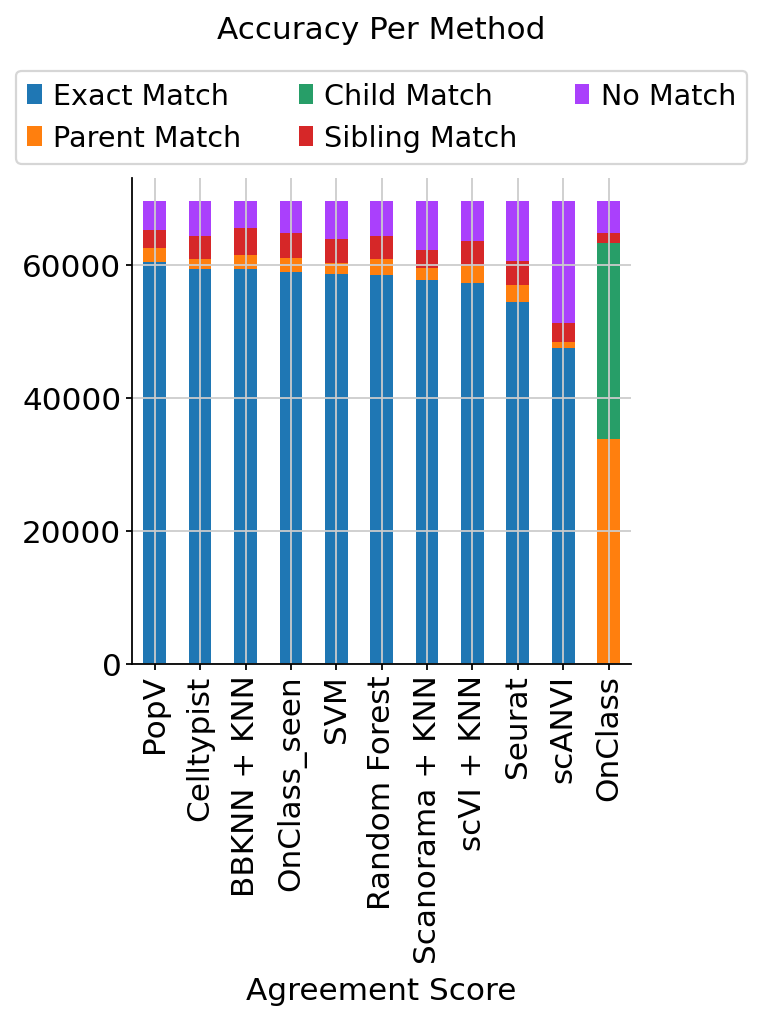

In [130]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3)


In [131]:
ax.get_figure().savefig('fig2/accuracy_per_method.pdf', bbox_inches='tight')

# Accuracy Bar Plots

In [132]:
query.obs['consensus_ontology_accuracy']

P1_4_TTGGAACTCCGTAGTA         exact
P1_4_TTGGCAAAGAGGACGG         exact
P1_4_TTCTTAGAGGATGGTC         exact
P1_4_TTGGAACAGGGATCTG         exact
P1_4_TTGCGTCTCAGATAAG         exact
                             ...   
K23_B003269.gencode.vH29      exact
K21_B003269.gencode.vH29    sibling
B4_B002460.gencode.vH29       exact
K19_B003269.gencode.vH29      exact
G3_B003269.gencode.vH29       exact
Name: consensus_ontology_accuracy, Length: 69650, dtype: category
Categories (5, object): ['child', 'exact', 'no match', 'parent', 'sibling']

In [133]:
neighbor_cells = query.obs['consensus_ontology_accuracy']!='no match'

In [134]:
neighbor_cells

P1_4_TTGGAACTCCGTAGTA       True
P1_4_TTGGCAAAGAGGACGG       True
P1_4_TTCTTAGAGGATGGTC       True
P1_4_TTGGAACAGGGATCTG       True
P1_4_TTGCGTCTCAGATAAG       True
                            ... 
K23_B003269.gencode.vH29    True
K21_B003269.gencode.vH29    True
B4_B002460.gencode.vH29     True
K19_B003269.gencode.vH29    True
G3_B003269.gencode.vH29     True
Name: consensus_ontology_accuracy, Length: 69650, dtype: bool

In [135]:
query.obs.loc[neighbor_cells, 'consensus_ontology_neighborhood_acc'] = 'is_neighbor'
query.obs.loc[~neighbor_cells, 'consensus_ontology_neighborhood_acc'] = 'not_neighbor'

In [136]:
acc_df = pd.DataFrame()

ct_by_acc = query.obs.groupby(['popv_prediction','consensus_ontology_neighborhood_acc']).size().unstack(level=1)

In [137]:
acc_df['neighbor_accuracy'] = ct_by_acc.divide(ct_by_acc.sum(axis=1), axis=0)['is_neighbor']

In [138]:
ct_by_acc = query.obs.groupby(['popv_prediction','consensus_ontology_accuracy']).size().unstack(level=1)

acc_df['absolute_accuracy'] = ct_by_acc.divide(ct_by_acc.sum(axis=1), axis=0)['exact'].values

In [139]:
acc_df['celltype count'] = query.obs.groupby(['cell_ontology_class']).size()

In [140]:
acc_df = acc_df.sort_values('celltype count', ascending=False)

array([<AxesSubplot:title={'center':'absolute_accuracy'}, xlabel='popv_prediction'>,
       <AxesSubplot:title={'center':'neighbor_accuracy'}, xlabel='popv_prediction'>,
       <AxesSubplot:title={'center':'celltype count'}, xlabel='popv_prediction'>],
      dtype=object)

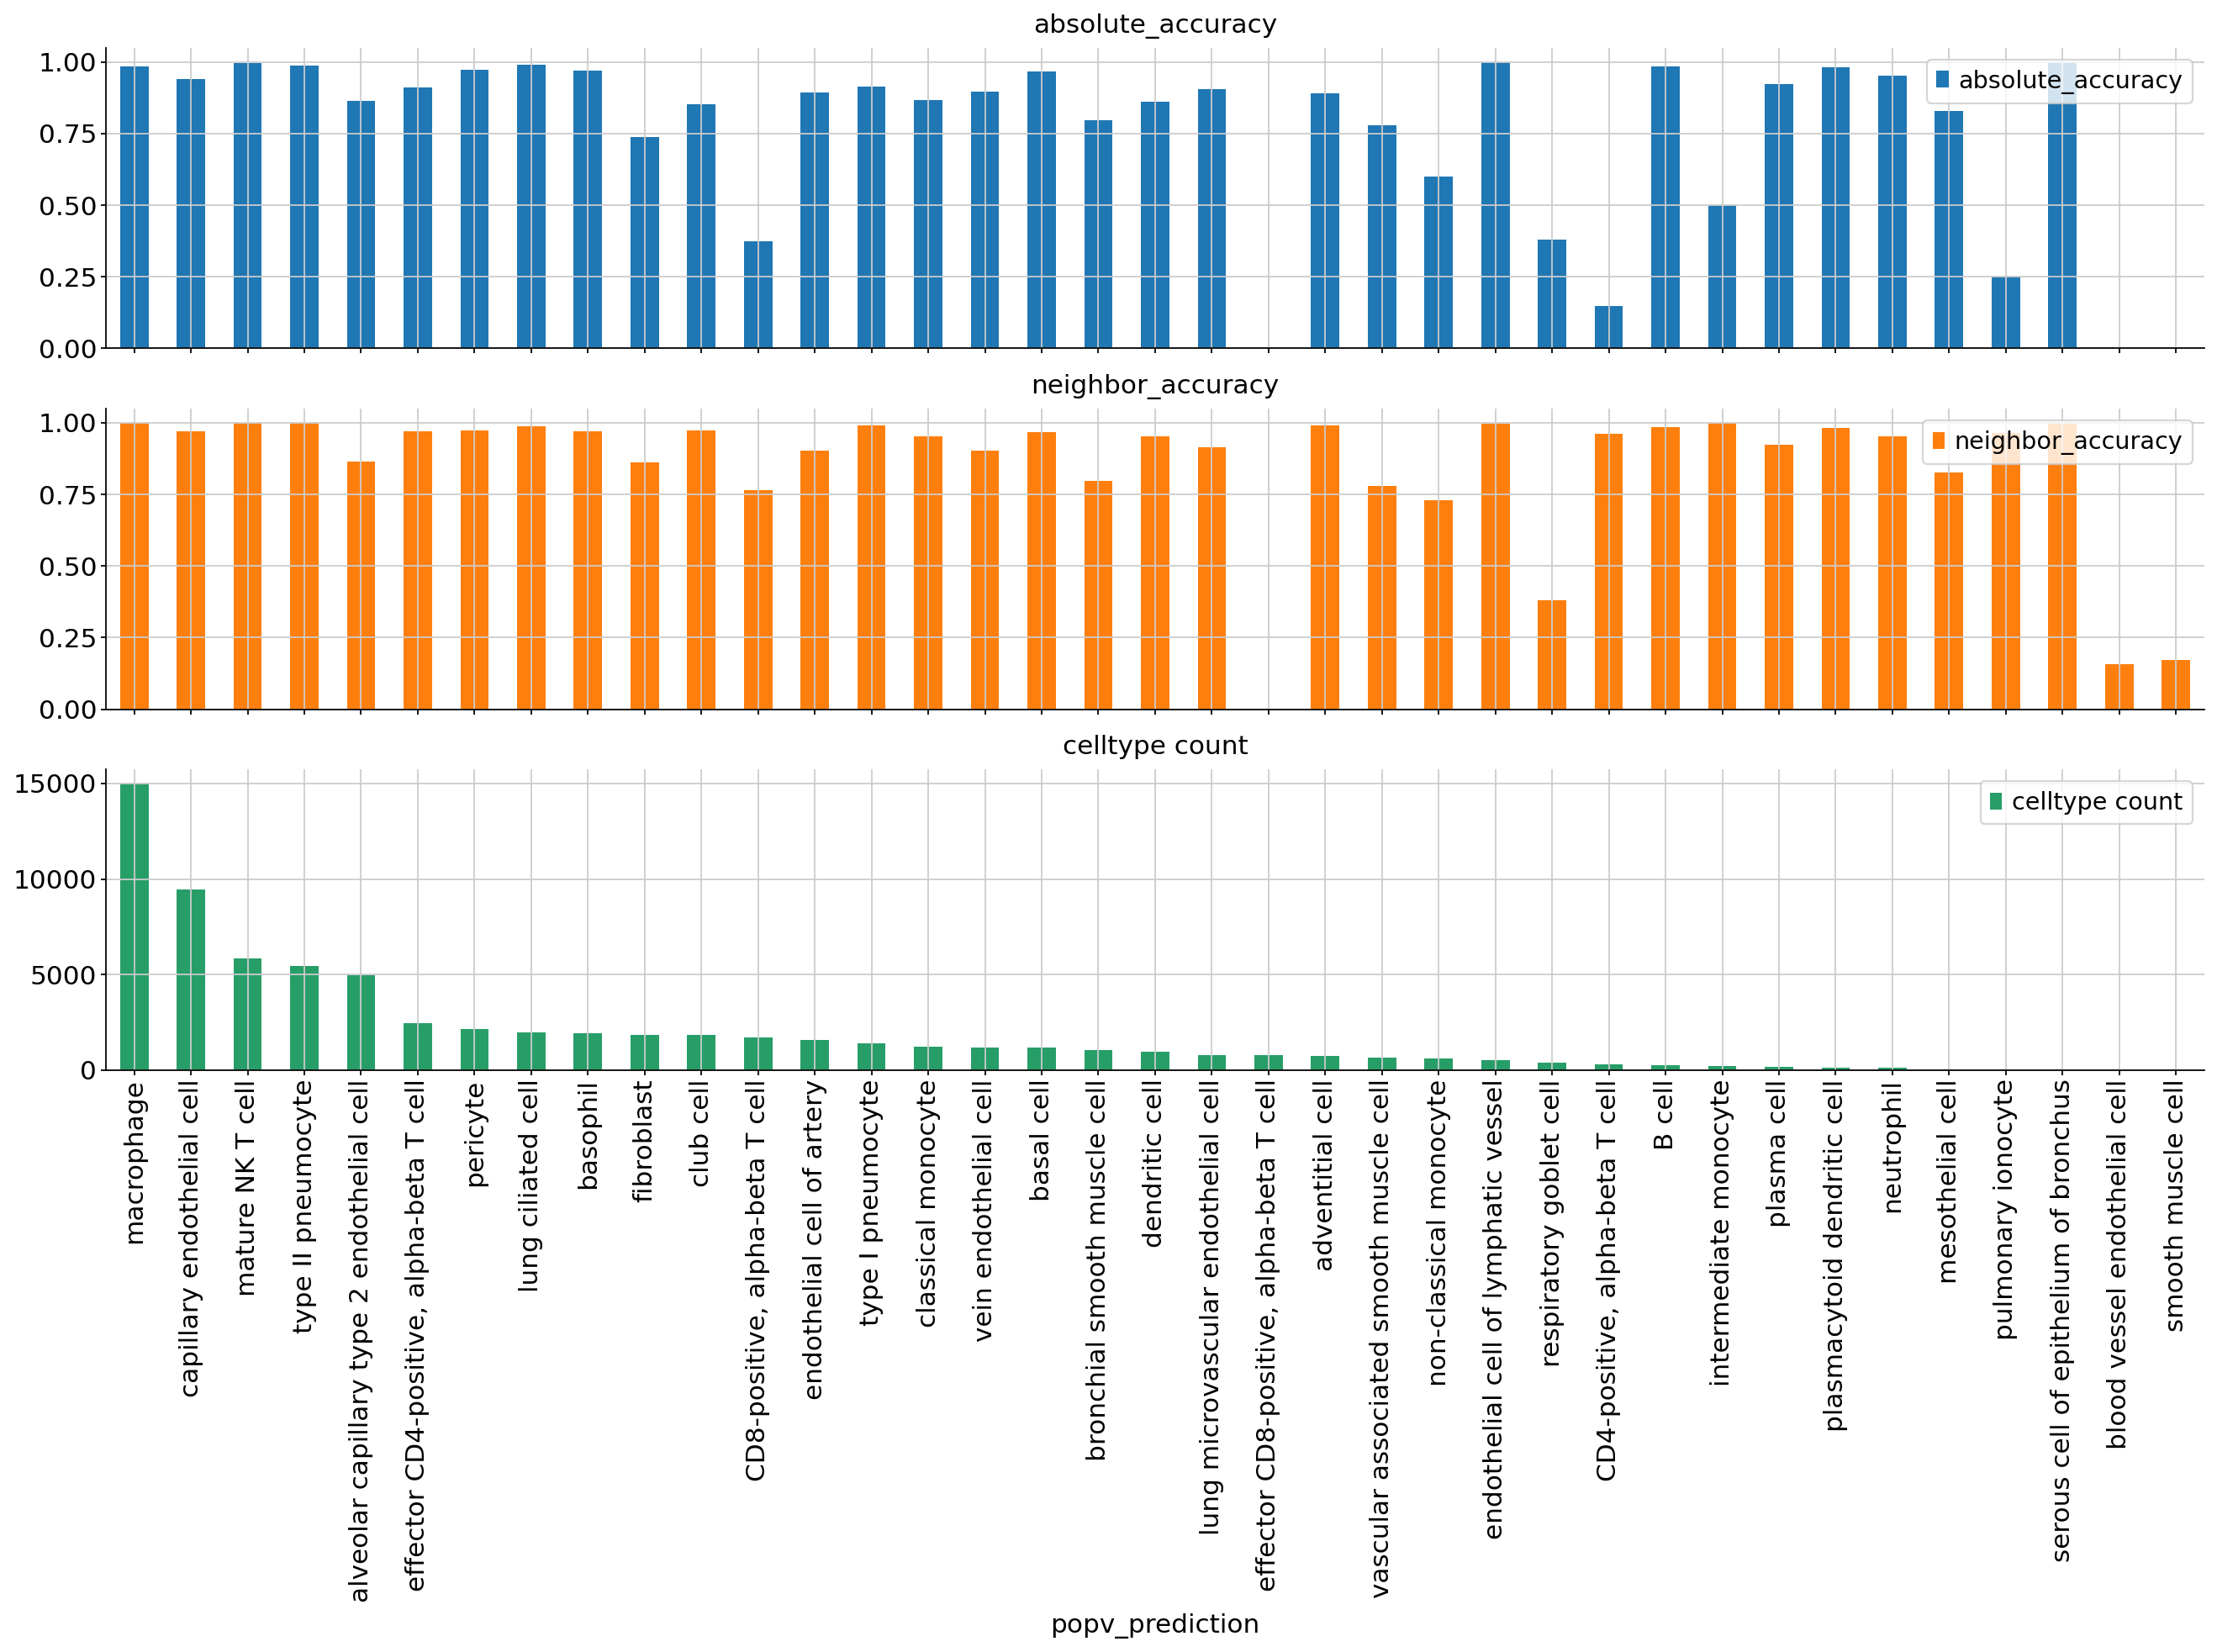

In [141]:
acc_df[['absolute_accuracy', 'neighbor_accuracy', 'celltype count']].plot.bar(figsize=(20,10), subplots=True)


In [142]:
acc_df['neighbor only accuracy'] = acc_df['neighbor_accuracy'] - acc_df['absolute_accuracy']

In [143]:
acc_df

,neighbor_accuracy,absolute_accuracy,celltype count,neighbor only accuracy
popv_prediction,,,,
macrophage,0.998873,0.985678,14992.0,0.013195
capillary endothelial cell,0.969136,0.941337,9443.0,0.027799
mature NK T cell,0.999599,0.995793,5850.0,0.003806
type II pneumocyte,0.998449,0.986235,5444.0,0.012214
alveolar capillary type 2 endothelial cell,0.863668,0.863668,4974.0,0.000000
"effector CD4-positive, alpha-beta T cell",0.970588,0.911765,2432.0,0.058824
pericyte,0.972352,0.972352,2126.0,0.000000
lung ciliated cell,0.989399,0.989399,1960.0,0.000000
basophil,0.970090,0.970090,1947.0,0.000000


In [144]:
acc_df['Absolute Accuracy'] = acc_df['absolute_accuracy']
acc_df['Neighbor Only Accuracy'] = acc_df['neighbor only accuracy']

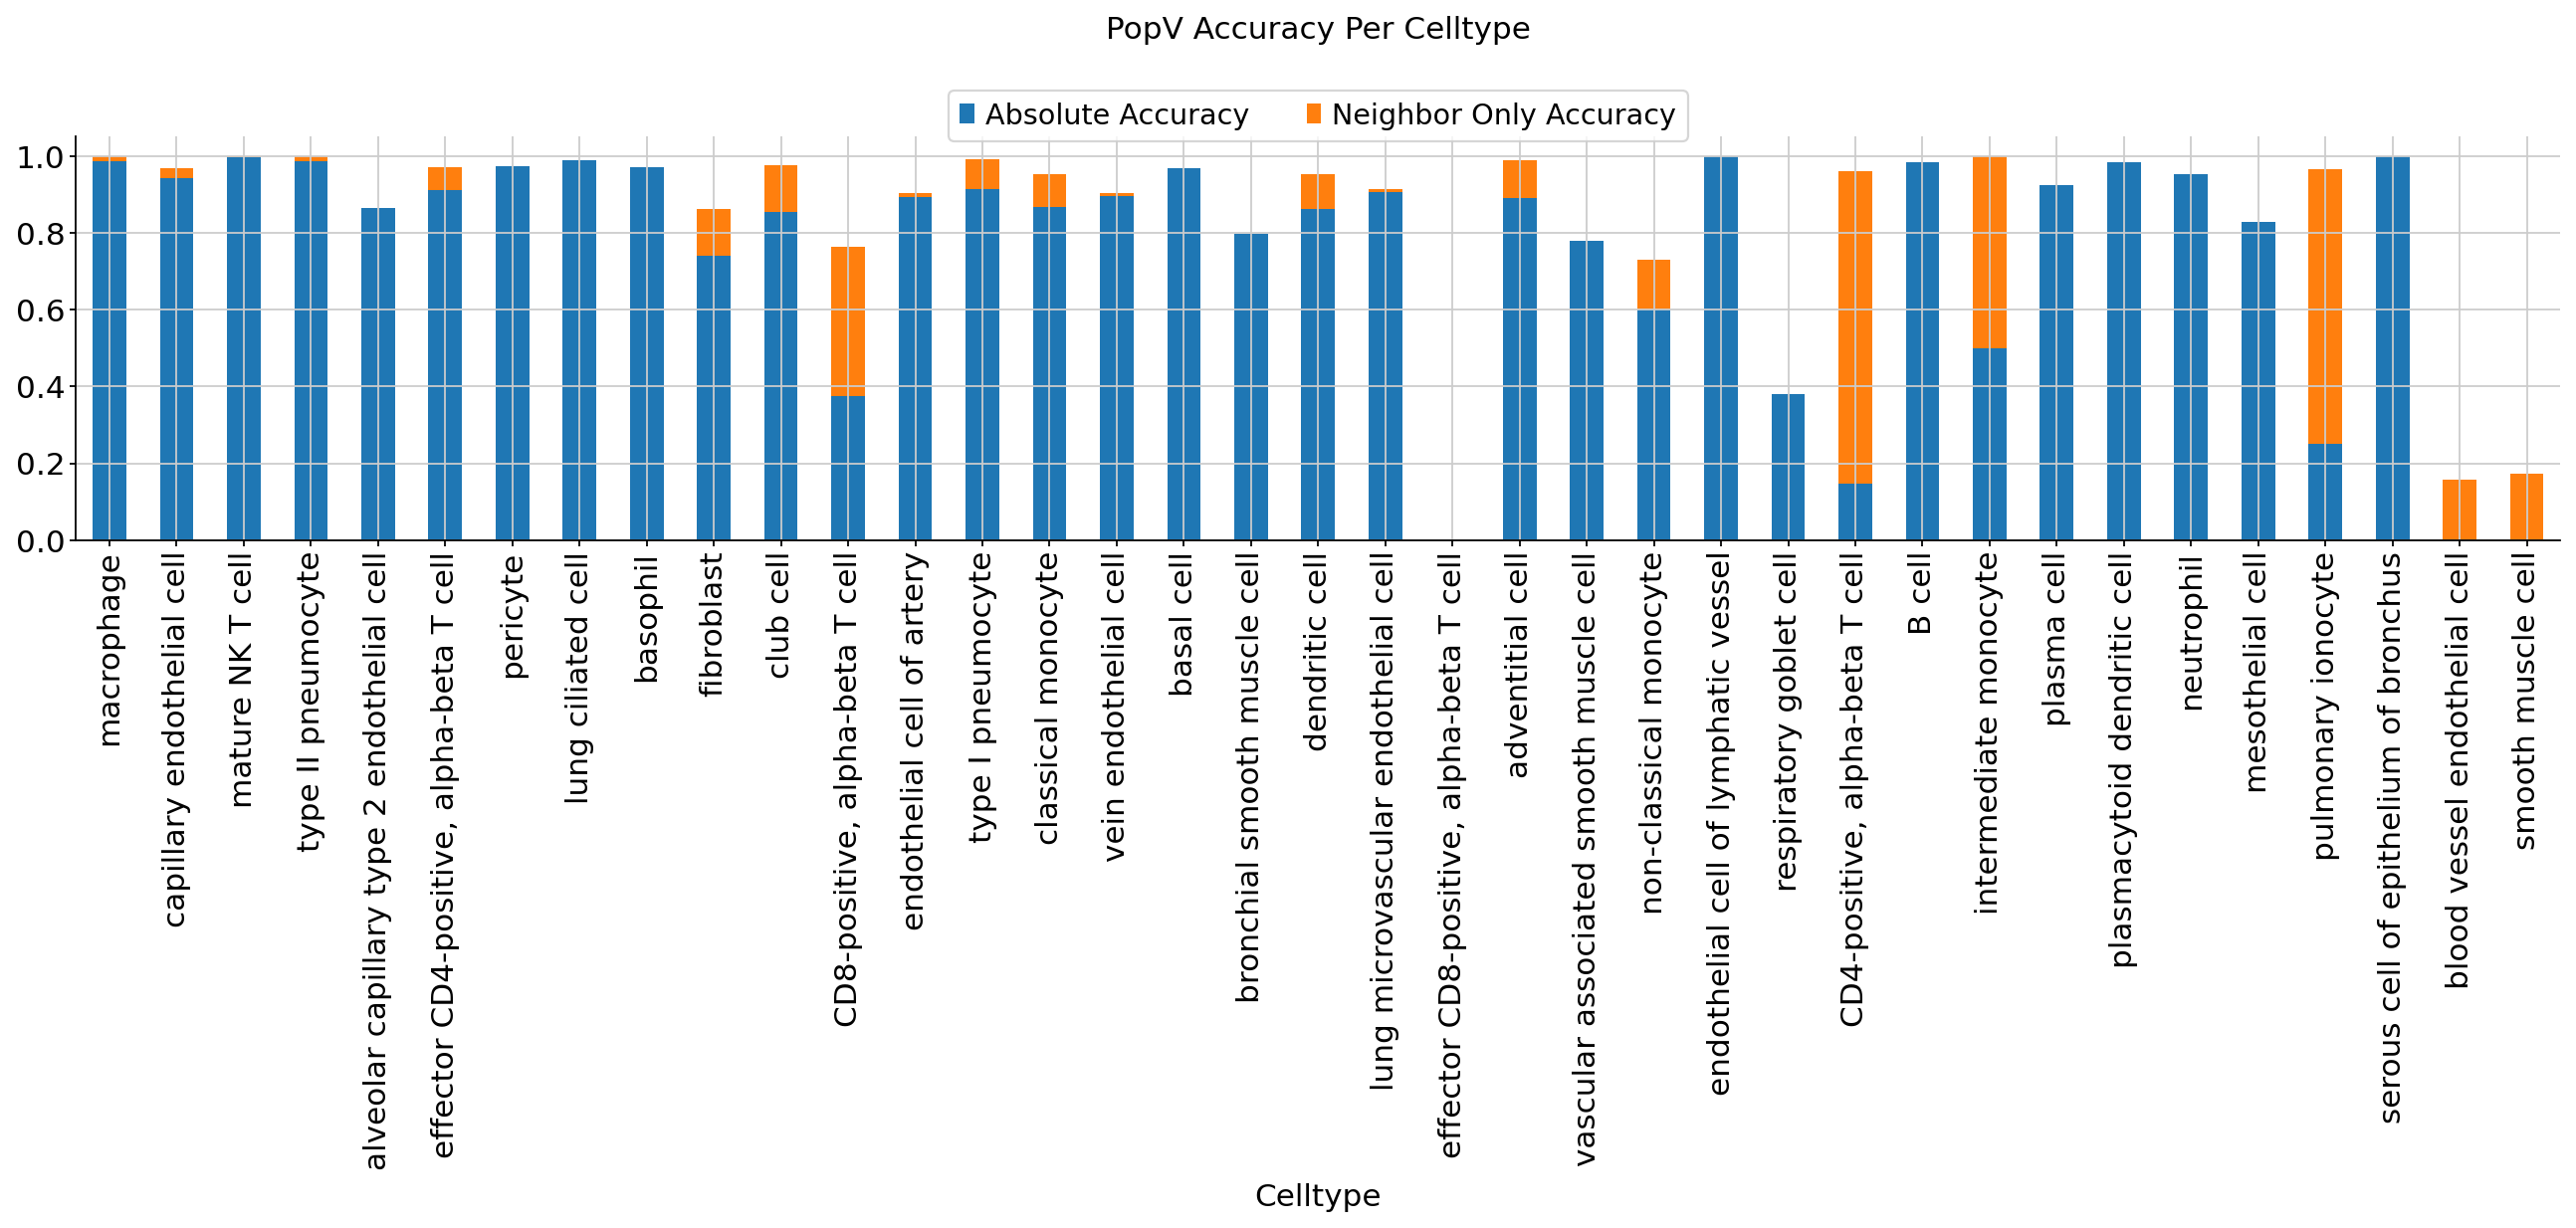

In [145]:
ax = acc_df[['Absolute Accuracy','Neighbor Only Accuracy']].plot.bar(figsize=(20,10/3), stacked=True)
ax.set_xlabel('Celltype')
ax.set_title('PopV Accuracy Per Celltype', y=1.2)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=2)


In [146]:
fig = ax.get_figure()
fig.savefig('fig2/fig2_popv_acc_per_celltype.pdf', bbox_inches='tight')

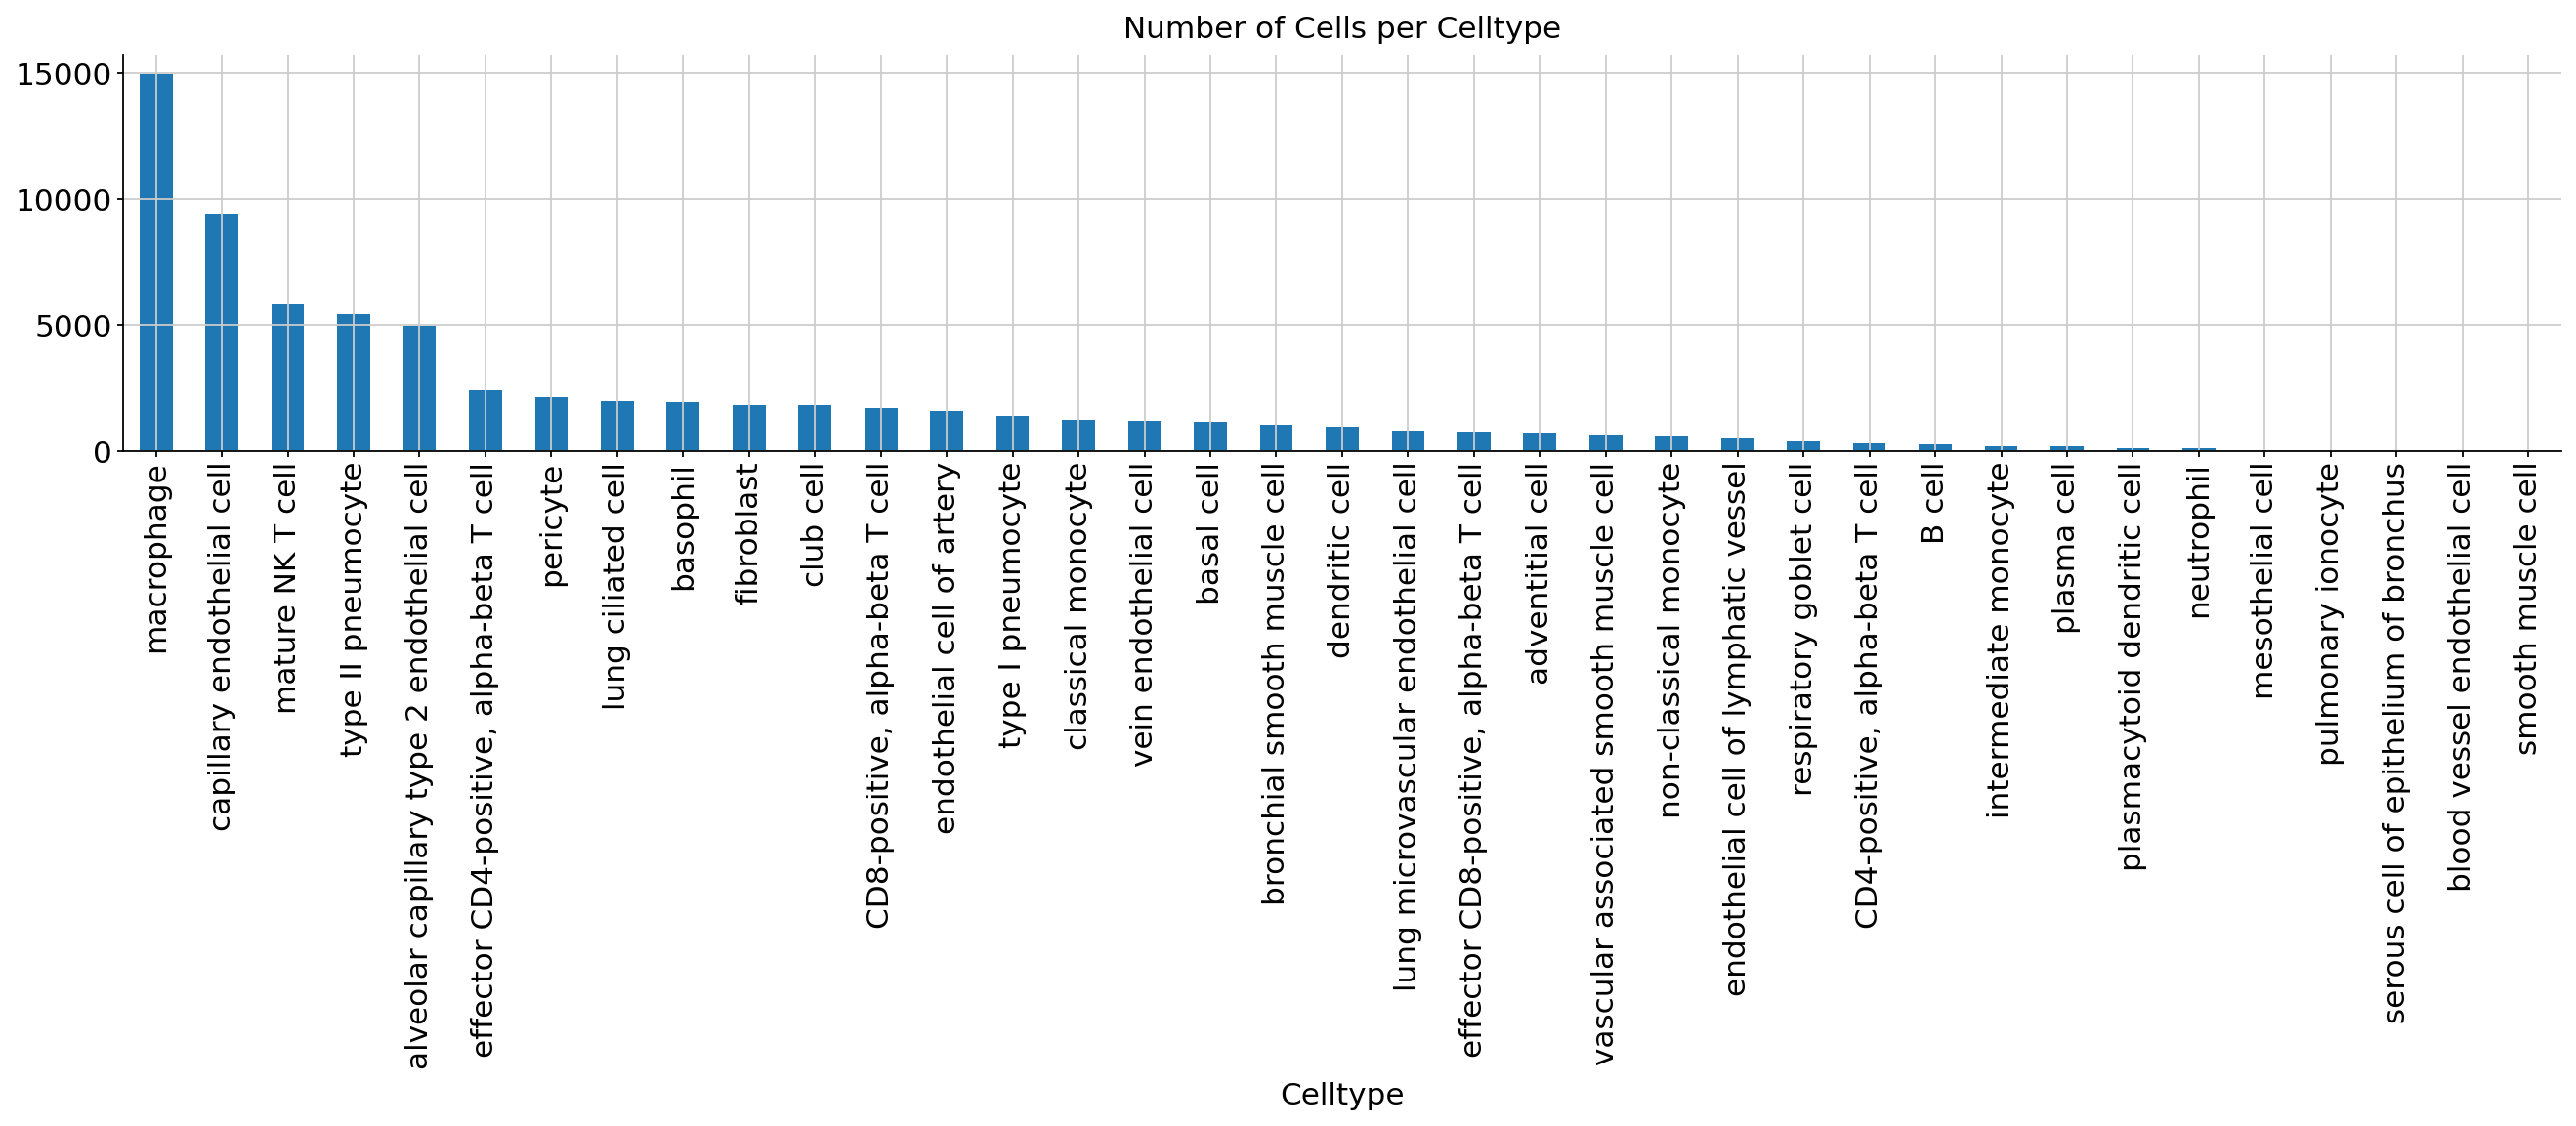

In [147]:
ax = acc_df[['celltype count']].plot.bar(figsize=(20,10/3))
ax.set_xlabel('Celltype')
ax.set_title('Number of Cells per Celltype')
ax.get_legend().remove()

In [148]:
ax.get_figure().savefig('fig2/fig2_celltype_count.pdf', bbox_inches='tight')

In [149]:
query

AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probabilities'

In [150]:
agreement_per_ct = query.obs.groupby(['popv_prediction','popv_prediction_score']).size().unstack(level=1)

In [151]:
n_cells = agreement_per_ct.sum(axis=1).values

In [152]:
agreement_per_ct

popv_prediction_score,1,2,3,4,5,6,7,8
popv_prediction,,,,,,,,
B cell,1,0,1,2,24,34,185,0
"CD4-positive, alpha-beta T cell",1,3,201,700,573,473,0,0
"CD8-positive, alpha-beta T cell",1,4,265,676,712,551,1191,679
adventitial cell,0,0,1,4,64,65,70,277
alveolar capillary type 2 endothelial cell,0,1,10,73,247,356,4983,0
basal cell,0,4,6,42,41,63,107,867
basophil,0,0,2,15,29,18,18,1924
blood vessel endothelial cell,0,0,8,4,6,1,0,0
bronchial smooth muscle cell,0,1,50,109,124,271,615,0


In [156]:
for i in range(1,8):
    agreement_per_ct[str(i)] = agreement_per_ct[i] * i

In [157]:
%%capture
ax = pd.DataFrame(agreement_per_ct.sum(axis=1).divide(n_cells), columns =['Average PopV Score']).plot.bar(figsize=(20,10/3))

In [158]:
ax.set_title('Average PopV Score per Celltype')
ax.set_xlabel('Celltype')
ax.get_legend().remove()
fig = ax.get_figure()

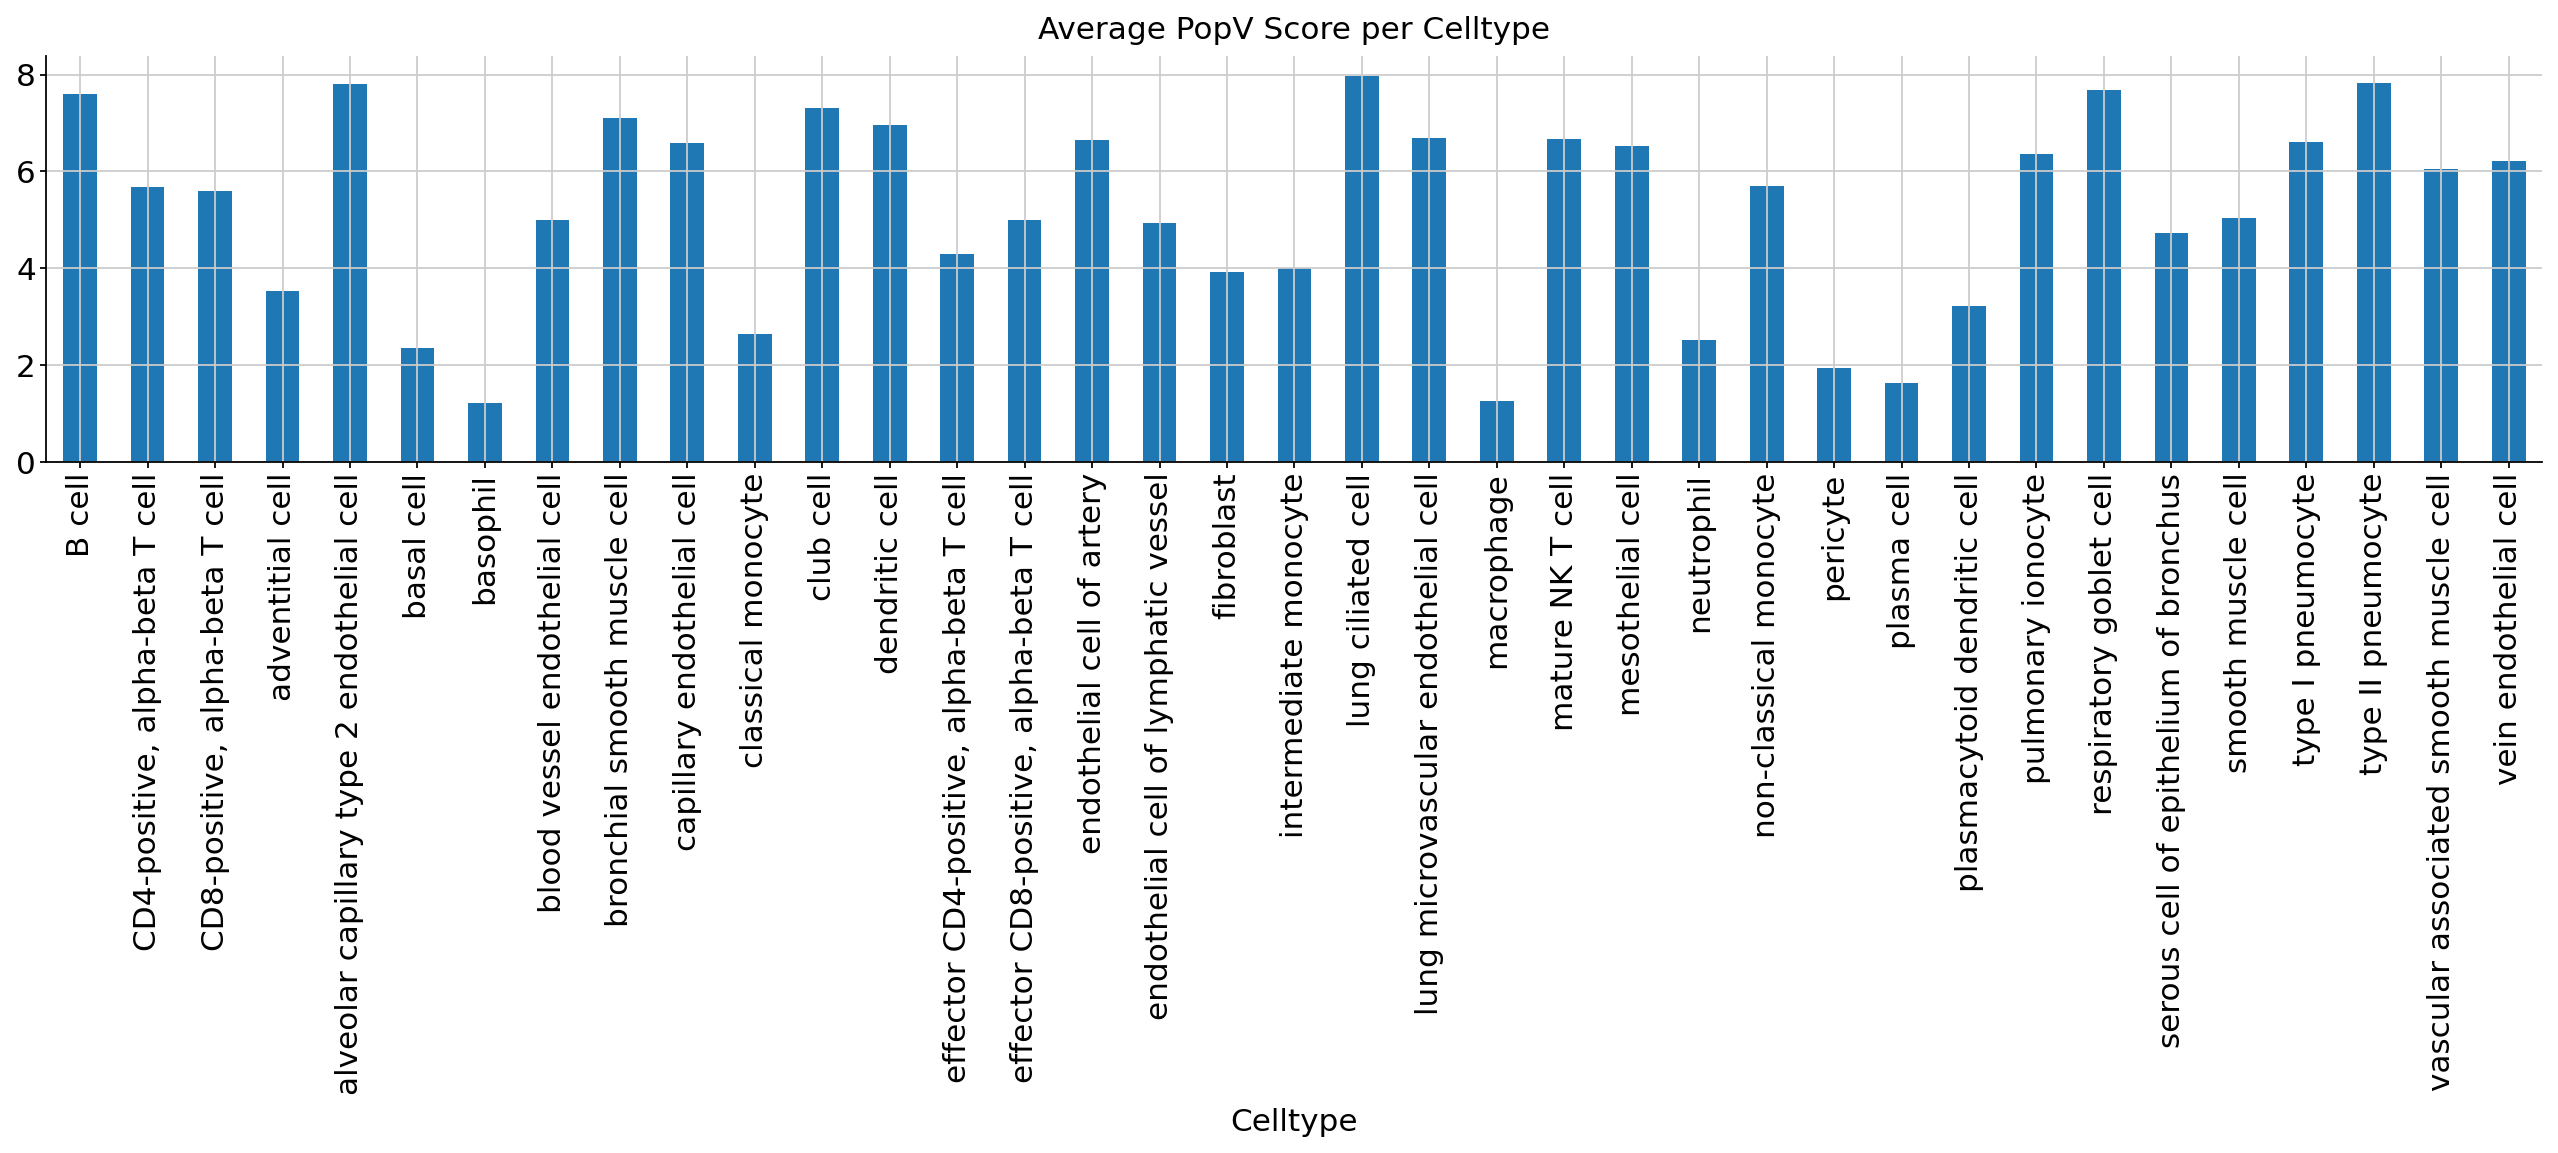

In [159]:
fig

In [160]:
fig.savefig('fig2/fig2_popv_score_per_method.pdf', bbox_inches='tight')

In [161]:
query

AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probabilities'

In [162]:
pred_keys_acc = [k for k in query.obs.keys() if k.endswith('_ontology_accuracy')]

In [163]:
pred_keys_acc

['consensus_ontology_accuracy',
 'popv_celltypist_prediction_ontology_accuracy',
 'popv_onclass_prediction_ontology_accuracy',
 'popv_scanvi_prediction_ontology_accuracy',
 'popv_rf_prediction_ontology_accuracy',
 'popv_knn_on_scanorama_prediction_ontology_accuracy',
 'popv_svm_prediction_ontology_accuracy',
 'popv_onclass_seen_ontology_accuracy',
 'popv_knn_on_scvi_prediction_ontology_accuracy',
 'popv_knn_on_bbknn_prediction_ontology_accuracy',
 'seurat_prediction_ontology_accuracy']

In [164]:
n_obs = query.n_obs

In [165]:
acc_df = pd.DataFrame(columns =['Exact Match', 'Parent Match', 'Sibling Match', 'Child Match'])

In [166]:
for k in pred_keys_acc:
    absolute_acc = query[query.obs[k]=='exact'].n_obs/n_obs
    parent_acc = query[query.obs[k] == 'parent'].n_obs/n_obs
    sibling_acc = query[query.obs[k] == 'sibling'].n_obs/n_obs
    child_acc = query[query.obs[k] == 'child'].n_obs/n_obs
    
    acc_df.loc[k] = [absolute_acc, parent_acc, sibling_acc, child_acc]

In [167]:
acc_df.index = [s.replace('_ontology_accuracy', '') for s in acc_df.index]

In [168]:
acc_df.index

Index(['consensus', 'popv_celltypist_prediction', 'popv_onclass_prediction',
       'popv_scanvi_prediction', 'popv_rf_prediction',
       'popv_knn_on_scanorama_prediction', 'popv_svm_prediction',
       'popv_onclass_seen', 'popv_knn_on_scvi_prediction',
       'popv_knn_on_bbknn_prediction', 'seurat_prediction'],
      dtype='object')

In [173]:
acc_df.index = [s.replace('consensus', 'PopV') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_scanorama_prediction', 'Scanorama + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_scvi_prediction', 'scVI + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_scanvi_prediction', 'scANVI') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_bbknn_prediction', 'BBKNN + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_rf_prediction', 'Random Forest') for s in acc_df.index]
acc_df.index = [s.replace('popv_onclass_seen', 'OnClass_seen') for s in acc_df.index]
acc_df.index = [s.replace('seurat_prediction', 'Seurat') for s in acc_df.index]
acc_df.index = [s.replace('popv_onclass_prediction', 'OnClass') for s in acc_df.index]
acc_df.index = [s.replace('popv_celltypist_prediction', 'Celltypist') for s in acc_df.index]
acc_df.index = [s.replace('popv_svm_prediction', 'SVM') for s in acc_df.index]

In [174]:
acc_df = acc_df.sort_values("Exact Match", ascending=False)

In [175]:
%%capture
ax = acc_df.plot.bar(stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16),ncol=4)
ax.set_title('Accuracy Per Method', y=1.16)
ax.set_xlabel('Method')
fig = ax.get_figure()

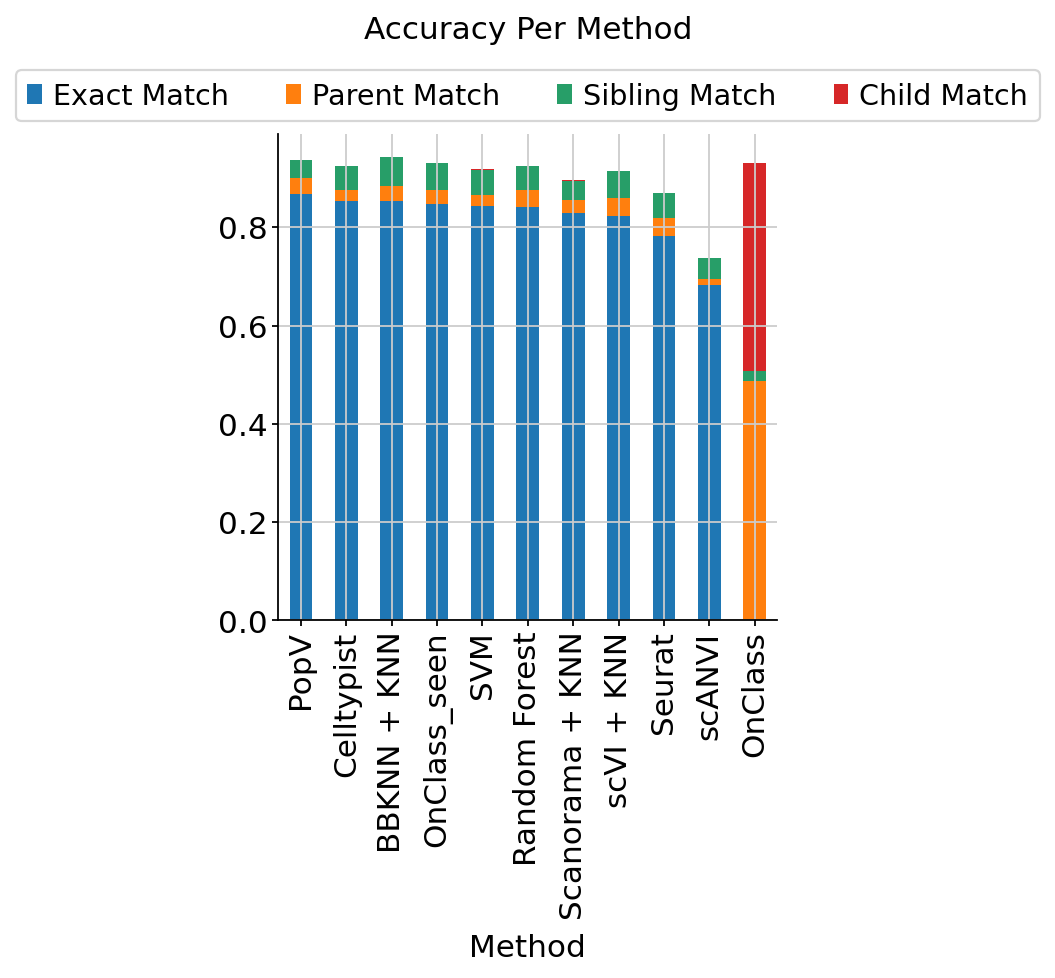

In [176]:
fig

In [177]:
%%capture
ax = acc_df.plot.bar(stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09),ncol=4)
ax.set_title('Accuracy Per Method', y=1.09)
ax.set_xlabel('Method')
fig = ax.get_figure()

In [178]:
fig.savefig('fig2/fig2_acc_per_method.pdf', bbox_inches='tight')

# Fine check of no match

In [181]:
# Fine check of no match